In [11]:
import time
import datetime
import numpy as np
import pandas as pd
from sklearn import datasets, preprocessing, model_selection
from sklearn import naive_bayes, svm, ensemble, tree, linear_model
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [12]:
def plot_learning_curve(estimator, title, X, y, ax, ylim=None, cv=None, n_jobs=3):
    """
    绘画学习曲线
    estimator：模型评估器
    title：标题
    ax,  坐标子图
    ylim=None, 
    cv=None, # 交叉验证
    n_jobs=3：所使用的线程数
    """
    train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, 
                                                                            X, 
                                                                            y, 
                                                                            cv=cv, 
                                                                            n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel('Training example')
    ax.set_ylabel('score')
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o--', color='r', label='train score')
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', c='b', label='test score')
    ax.legend()
    return ax
    

0.6764770000000055
GNB:00:00:676477
0.7388130000000004
DTC:00:00:738813
0.7279060000000044
RFC:00:00:727906
0.732960999999996
LR:00:00:732961
0.7044150000000045
SVC:00:00:704415


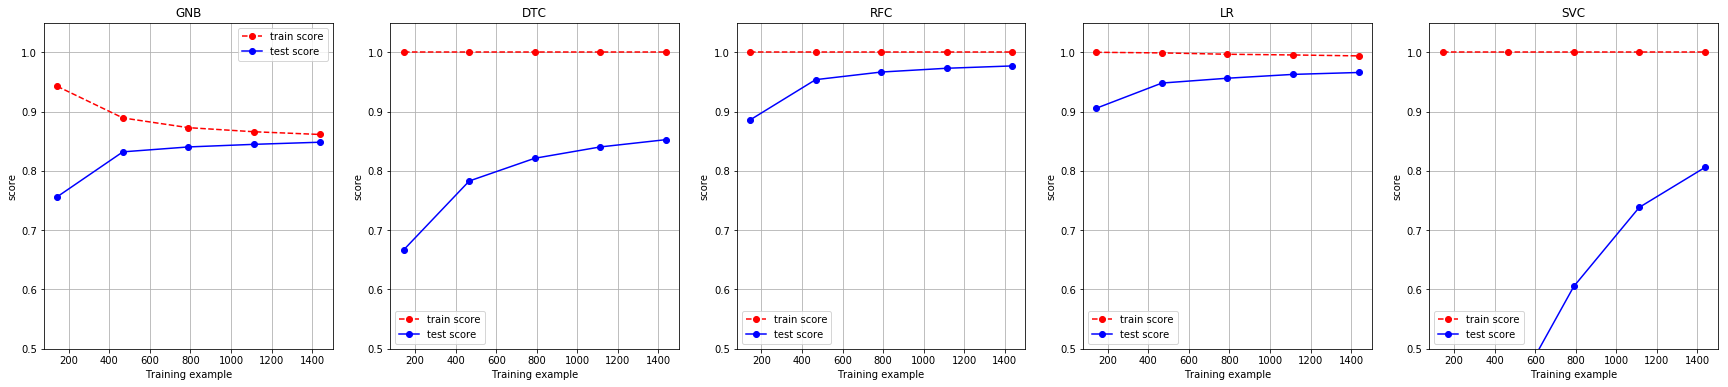

In [35]:
# 获取数据集
digits = datasets.load_digits()
X, y = digits.data, digits.target
names = ['GNB', 'DTC', 'RFC', 'LR', 'SVC']
classifiers = [
    naive_bayes.GaussianNB(), #高斯朴素贝叶斯
    tree.DecisionTreeClassifier(), # 决策树
    ensemble.RandomForestClassifier(n_estimators=100), # 随机森林
    linear_model.LogisticRegression(C=0.1, solver='lbfgs'),
    svm.SVC(gamma=0.01)
]
cv = model_selection.ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
for index, title, model in zip(range(len(names)),names, classifiers):
    start = time.process_time()
    plot_learning_curve(model, title, X, y, ax=axes[index],
                        ylim=[0.5, 1.05], cv=cv, n_jobs=2)
    end = time.process_time()
    print(end - start)
    print('{0}:{1}'.format(title, datetime.datetime.fromtimestamp(end - start).strftime('%M:%S:%f')))
plt.show()

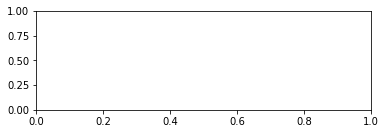

In [15]:
plt.subplot(2, 1, 1) # 返回的是axes对象

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x117b51588>,
       dtype=object))

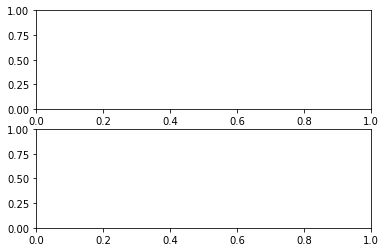

In [20]:
 plt.subplots(2, 1) # 返回Figure和axes两个对象